<img src="t31.png" />

In [1]:
#! /usr/bin/python3

from numpy import *

import matplotlib.pyplot as plt # from pylab import plot,show
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings("ignore")


#######################################################################################################
#######################################################################################################
######################################     EJERCICICIO 1     ##########################################
#######################################################################################################
#######################################################################################################
print ("")
print ("EJERCICIO 1:")
print("###############")
print ("")


### MÉTODO DE SOLUCIóN BACKWARD ###

M11=array([(1.0,2.0,1.0),
          (0.0,-4.0,1.0),
          (0.0,0.0,-2.0)])
         
M12=array([5.0,2.0,4.0])


def sust_inv(M,N):
    rangoM = len(M)
    x = zeros(rangoM)  #se inicia matriz x
    for i in range(rangoM-1,-1, -1):   #se hace conteo inverso
            temp = N[i]
            for k in range(rangoM-1,i, -1):
                temp -= M[i][k]*x[k]
            x[i] = temp/M[i][i] 
    return (x)


print ("")
print ("### MÉTODO DE SOLUCIóN BACKWARD ###")
print ("Sean las matrices del problema:")
print ("A=")
print (M11)
print ("B=")    
print (M12)          
print ("Por sustitución backward obtenemos los siguientes resultados para")
print ("[x1, x2, x3]")
print (sust_inv(M11,M12))  


### MÉTODO DE SOLUCIóN FORWARD ###

M21=array([(2.0,0.0,0.0),
          (2.0,4.0,0.0),
          (4.0,3.0,3.0)])
         
M22=array([4.0,2.0,5.0])
print ("")
print ("### MÉTODO DE SOLUCIóN FORWARD ###")
print ("Sean las matrices del problema:")
print ("A=")
print (M21)
print ("B=")    
print (M22)          
print ("Por sustitución forward obtenemos los siguientes resultados para")
print ("[x1, x2, x3]")
print (sust_inv(M21,M22)) 




EJERCICIO 1:
###############


### MÉTODO DE SOLUCIóN BACKWARD ###
Sean las matrices del problema:
A=
[[ 1.  2.  1.]
 [ 0. -4.  1.]
 [ 0.  0. -2.]]
B=
[5. 2. 4.]
Por sustitución backward obtenemos los siguientes resultados para
[x1, x2, x3]
[ 9. -1. -2.]

### MÉTODO DE SOLUCIóN FORWARD ###
Sean las matrices del problema:
A=
[[2. 0. 0.]
 [2. 4. 0.]
 [4. 3. 3.]]
B=
[4. 2. 5.]
Por sustitución forward obtenemos los siguientes resultados para
[x1, x2, x3]
[2.         0.5        1.66666667]


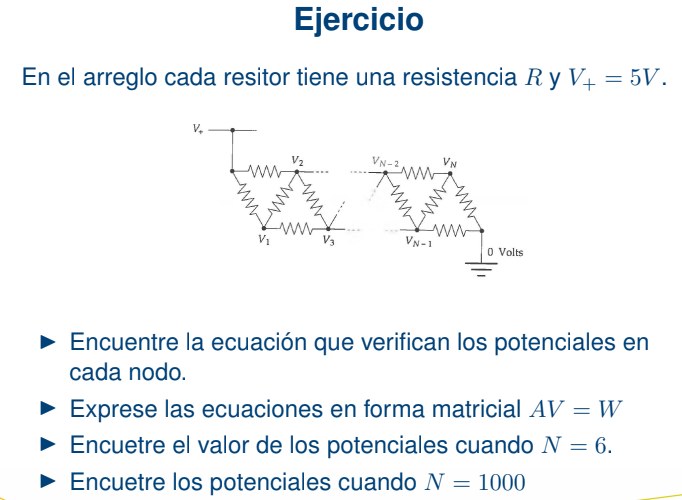

In [3]:
#######################################################################################################
#######################################################################################################
######################################     EJERCICICIO 2     ##########################################
#######################################################################################################
#######################################################################################################
print ("")
print ("EJERCICIO 2:")
print("###############")
print ("")


def creando_matrizV(N):
    
    #generando la matriz para N resistencias con R=1 Ohm

    V=zeros([N,N])

    #luego de hacer las ecuaciones vemos un patrón repetitivo
    #los enunciamos para agregarlos facilmente

    patron_1 = [3,-1,-1]
    patron_2 = [-1,4,-1,-1] 
    patron_k = [-1,-1,4,-1,-1] 
    patron_1n = [-1,-1,4,-1]
    patron_n = [-1,-1,3]

    #creando la matriz A(N,N)
    
    for i in range(0,N,1):
        if i == 0 :             #para llenar la primera linea de 0s
            for j in range (N-3):  # = N - len(patron_1)
                patron_1.append(0)    #agrego 0 hasta que concuerde con el rango
            V[0]=patron_1
        if i == 1 :
            for j in range (N-4): # = N - len(patron_2)
                patron_2.append(0)    #agrego 0 hasta que concuerde con el rango
            V[1]=patron_2
        if i > 1 :
            if i < N-2 :
                temp = []
                for j in range (i-2):  #lleno lo ceros necesarios al inicio de esta fila                
                    temp.append(0)
                for j in range (0,5,1): #agregando los valores de patron_k a temp, 5 = len(patron_k)
                    elem_k = patron_k[j]
                    temp.append(elem_k)
                rangito = len(temp)     # i+1+len(patron_k)
                if rangito < N:
                    for j in range (rangito-1,N-1): #añado lo ceros faltantes hasta concordar con el rango
                            temp.append(0)
                V[i]=temp
            if i == N-2 :     #pues la linea N-1 muestra un patrón único, N-1 <> N-2 por i empezar en 0
                    temp = []
                    for j in range (N-4): # = N - len(patron_1n)
                        temp.append(0)  #lleno lo ceros necesarios al inicio de esta fila
                    for j in range (0,4,1): #agregando los valores de patron_1n a temp, 4 = len(patron_1n)
                        elem_1n = patron_1n[j]
                        temp.append(elem_1n)
                    V[i]=temp
            if i == N-1 :  #pues N también muestra un patrón único
                    temp = []
                    for j in range (N-3): # = N - len(patron_n)
                        temp.append(0)  #lleno lo ceros necesarios al inicio de esta fila
                    for j in range (0,3,1): #agregando los valores de patron_1n a temp, 3 = len(patron_n)
                        elem_n = patron_n[j]
                        temp.append(elem_n) 
                    V[i]=temp
    print("Siendo las matrices del problema ")
    print("V=")
    return(V)
 
def creando_matrizB(N):                    
    #creando matriz B(N,1)
    temp=[5,5] #valores inmovibles que se encontraron en las eqs
    for i in range(N-2):
        temp.append(0)
    B=temp
    
    return(B)


#####FUNCION PARA DESCOMPOSICION DE CHOLESKY#####

def Descomp_Cholesky(M,N):
    dim_M = M.shape
    rangoM = len(M)
    g = zeros(dim_M)
    for i in range(0,rangoM, 1):
        temp = 0
        for k in range(0,i,1):     #buscamos la raiz pedida
            temp = temp + g[k][i]**2
        g[i][i] = sqrt(M[i, i] - temp)
        for j in range(i+1,rangoM, 1):
            temp = 0
            for k in range(0,i,1):
                temp = temp + g[k][i]*g[k][j]
            g[i, j] = (M[i][j]-temp)/g[i][i]
    
    print ("")
    print ("Sea la matriz G para la descomposicion de Cholesky:") 
    print (g)
    print ("y sea su transpuesta:") 
    print (g.T)
    
    # se busca la matriz d por sustitucion forward
    d = []  #inicio la matriz d
    trans_g= g.T   #transpuesta de g
    rangoN = len(N)
    for i in range(rangoN):
        temp = 0
        d.append(N[i])
        for j in range(i):
            temp = temp + trans_g[i, j]*d[j]
        d[i] = (N[i] - temp)/trans_g[i, i]
    print("")
    print ("encontrandose la matriz d: ")    
    print(d)
    
    #se busca la matriz x, por sustitucion backwards
    x = zeros(rangoM) #se inicia array para los valores de la matriz d
    for i in range(rangoM-1,-1, -1):   #se hace conteo inverso
            temp = d[i]
            for k in range(rangoM-1,i, -1):
                temp -= g[i][k]*x[k]
            x[i] = temp/g[i][i]  
    print ("")
    print ("se encuentra la matriz x:") 
    return (x)


#####FUNCION PARA DESCOMPOSICION DE LU#####

def Descomp_LU(M,N):
    
    #hallamos las matrices L y U

    dim_M = M.shape
    rangoM = len(M)
    L = zeros(dim_M) #inicio matriz L con tamaño dim_M=(rangoM,rangoM) por ser M cuadrada
    U = zeros(dim_M) #inicio U
    for i in range(rangoM):
        L[i,i] = 1.0    #llena la diagonal de L de 1's
        for j in range(i+1,rangoM):
            L[j,i] = M[j,i]/M[i,i]  #Genera la fila j de la matriz
            for k in range(i+1,rangoM):
                M[j,k] = M[j,k] - L[j,i]*M[i,k]
        for k in range(i,rangoM):
            U[i,k] = M[i,k]  #genera la fila i de la matriz U
    print("matrices L y  U respectivamente")
    print("L=")
    print(L)
    print("")
    print("U=")
    print(U)
    print("")
    
    #obtenemos la matriz d (de la eq Ld = b)
    #para esta funcion: b = N
    #usamos la sustitución forward 
    
    d = []  #inicio la matriz d
    rangoN = len(N)
    for i in range(rangoN):
        temp = 0
        d.append(N[i])
        for j in range(i):
            temp = temp + L[i, j]*d[j]
        d[i] = (N[i] - temp)/L[i, i]
    print("")
    print ("encontrandose la matriz d: _de la eq Ld = b_")    
    print(d)
    
    
    #obtenida d, hallamos x (de la eq Ux = d)
    #usamos sustitución backwards/sust_inv del ejercicio anterior
    
    x = zeros(rangoM)  #se inicia matriz x
    for i in range(rangoM-1,-1, -1):   #se hace conteo inverso
            temp = d[i]
            for k in range(rangoM-1,i, -1):
                temp -= U[i][k]*x[k]
            x[i] = temp/U[i][i]  
    print ("")
    print ("encontrandose la matriz x: _de la eq Ux = d_") 
    return (x)
    

V6 = creando_matrizV(6)
B6 = creando_matrizB(6)

print(V6)
print("V+=")
print(B6)
print ("")
print("___solución por diferentes métodos___")
print("")
print("DESCOMPOSICION de CHOLESKY")
print(Descomp_Cholesky(V6,B6))
print("= [V1 V2 V3 V4 V5 V6]")
print ("siendo estas las soluciones para los voltajes")
print("")
print("DESCOMPOSICION LU")
print ("")
print(Descomp_LU(V6,B6))
print("= [V1 V2 V3 V4 V5 V6]")
print ("siendo estas las soluciones para los voltajes")
print ("")

V1K = creando_matrizV(1000)
B1K = creando_matrizB(1000)

print(V1K)
#print(B1K) #a diferencia de creando_matrizV, esta si se imprime en su totalidad
print("descomentar la línea anterior si se quiere observar B(1000,1)")
print ("")
print ("OBSERVACION: Se generó la matriz para N=1k pero se procederá")
print ("con la matriz N=100 para agilizar el cálculo")

VC = creando_matrizV(100)
BC = creando_matrizB(100)

print("___solución por diferentes métodos___")
print("")
print("DESCOMPOSICION de CHOLESKY")
print(Descomp_Cholesky(VC,BC))
print("= [V1 V2 V3 ... V100]")
print ("siendo estas las soluciones para los voltajes")
print("")
print("DESCOMPOSICION LU")
print ("")
print(Descomp_LU(VC,BC))
print("= [V1 V2 V3 ... V100]")
print ("siendo estas las soluciones para los voltajes")
print ("")




EJERCICIO 2:
###############

Siendo las matrices del problema 
V=
[[ 3. -1. -1.  0.  0.  0.]
 [-1.  4. -1. -1.  0.  0.]
 [-1. -1.  4. -1. -1.  0.]
 [ 0. -1. -1.  4. -1. -1.]
 [ 0.  0. -1. -1.  4. -1.]
 [ 0.  0.  0. -1. -1.  3.]]
V+=
[5, 5, 0, 0, 0, 0]

___solución por diferentes métodos___

DESCOMPOSICION de CHOLESKY

Sea la matriz G para la descomposicion de Cholesky:
[[ 1.73205081 -0.57735027 -0.57735027  0.          0.          0.        ]
 [ 0.          1.91485422 -0.69631062 -0.52223297  0.          0.        ]
 [ 0.          0.          1.78376517 -0.76447079 -0.56061191  0.        ]
 [ 0.          0.          0.          1.77281052 -0.80582296 -0.56407607]
 [ 0.          0.          0.          0.          1.74251647 -0.83473843]
 [ 0.          0.          0.          0.          0.          1.40891091]]
y sea su transpuesta:
[[ 1.73205081  0.          0.          0.          0.          0.        ]
 [-0.57735027  1.91485422  0.          0.          0.          0.        ]
 [-

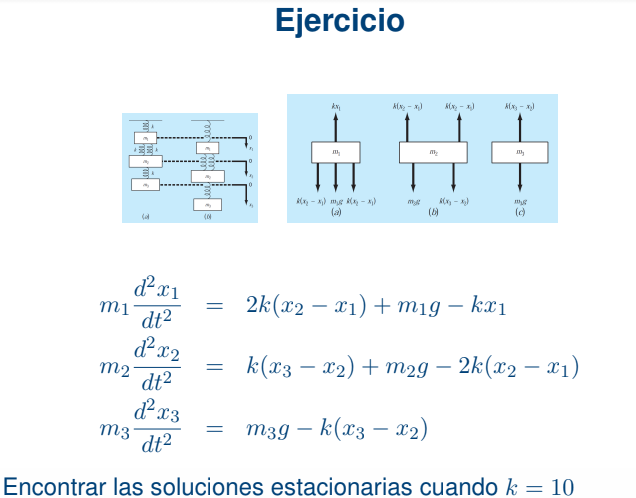

In [4]:

#######################################################################################################
#######################################################################################################
######################################     EJERCICICIO 3    ##########################################
#######################################################################################################
#######################################################################################################
print ("")
print ("EJERCICIO 3:")
print("###############")
print ("")

#Sean las matrices del problema

A =array([(30.,-20.,0),
    (20.,40.,-20.),
    (0,-10.,10.)])

#usando g=9.8m/s2
B = [9.8,9.8,9.8]



#usando factorizacion LU, se obtiene
print("")
print("DESCOMPOSICION LU")
print ("")
print(Descomp_LU(A,B))
print("= [x1 x2 x3]")
print ("siendo estas las soluciones estacionarias para las deformaciones")
print ("")

print("")
print("NOTA: no se puede realizar la descomposicion de Cholesky pues la matriz no es simétrica")


EJERCICIO 3:
###############


DESCOMPOSICION LU

matrices L y  U respectivamente
L=
[[ 1.          0.          0.        ]
 [ 0.66666667  1.          0.        ]
 [ 0.         -0.1875      1.        ]]

U=
[[ 30.         -20.           0.        ]
 [  0.          53.33333333 -20.        ]
 [  0.           0.           6.25      ]]


encontrandose la matriz d: _de la eq Ld = b_
[9.8, 3.2666666666666675, 10.412500000000001]

encontrandose la matriz x: _de la eq Ux = d_
[0.784 0.686 1.666]
= [x1 x2 x3]
siendo estas las soluciones estacionarias para las deformaciones


NOTA: no se puede realizar la descomposicion de Cholesky pues la matriz no es simétrica
